### ATM 240 - Snowfall Totals
---
- 72 hr Snowfall totals 

##### Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyproj import Proj
import matplotlib.cm as cm
import datetime
import os, sys
import xarray as xr
import cartopy.crs as ccrs # cartopy coordinate reference system
import cartopy.feature as cfeat # features like color-shading for land, ocean, coastlines, state boundaries

##### Auto-features

In [2]:
def features(ax):
    # Add coastlines and states, etc.
    ax.add_feature(cfeat.COASTLINE.with_scale('50m'), linewidth=2)
    ax.add_feature(cfeat.STATES.with_scale('50m'),linestyle='dotted')
    ax.add_feature(cfeat.LAKES,alpha=0.5) # alpha sets transparency level
    ax.add_feature(cfeat.RIVERS)
    ax.add_feature(cfeat.OCEAN.with_scale('50m'))
    ax.add_feature(cfeat.LAND.with_scale('50m'))
    ax.gridlines()
    # here is our SOC domain: the east coast
    ax.set_extent([-100,-65,23.5,49])
    
    return ax

##### View Data

In [3]:
ds = xr.open_dataset('/spare11/atm240/DATA/ERA5_SOC_surface.grib',engine='pynio')
ds

<xarray.Dataset>
Dimensions:                (forecast_time4: 12, g0_lat_1: 721, g0_lon_2: 1440, initial_time0_hours: 72, initial_time3_hours: 7)
Coordinates:
  * initial_time0_hours    (initial_time0_hours) datetime64[ns] 1993-03-12 .....
  * initial_time3_hours    (initial_time3_hours) datetime64[ns] 1993-03-11T18...
  * forecast_time4         (forecast_time4) timedelta64[ns] 01:00:00 ... 12:0...
  * g0_lat_1               (g0_lat_1) float32 90.0 89.75 89.5 ... -89.75 -90.0
  * g0_lon_2               (g0_lon_2) float32 0.0 0.25 0.5 ... 359.5 359.75
Data variables:
    CI_GDS0_SFC            (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    ASN_GDS0_SFC           (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    RSN_GDS0_SFC           (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    SSTK_GDS0_SFC          (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    SWVL1_GDS0_DBLY        (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    SWVL2_GDS0_DBLY        (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    SWVL3_GDS0_DBLY        (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    SWVL4_GDS0_DBLY        (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    SLT_GDS0_SFC           (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    SP_GDS0_SFC            (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    STL1_GDS0_DBLY         (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    SD_GDS0_SFC            (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    SF_GDS0_SFC_acc1h      (initial_time3_hours, forecast_time4, g0_lat_1, g0_lon_2) float32 ...
    MSL_GDS0_SFC           (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    10U_GDS0_SFC           (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    10V_GDS0_SFC           (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    2T_GDS0_SFC            (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    2D_GDS0_SFC            (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    STL2_GDS0_DBLY         (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    LSM_GDS0_SFC           (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    STL3_GDS0_DBLY         (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    SKT_GDS0_SFC           (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    STL4_GDS0_DBLY         (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    TSN_GDS0_SFC           (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    initial_time0_encoded  (initial_time0_hours) float64 ...
    initial_time3_encoded  (initial_time3_hours) float64 ...
    initial_time3          (initial_time3_hours) |S0 ...
    initial_time0          (initial_time0_hours) |S0 ...

##### To FInd Units

In [13]:
names =  ds.variables.keys()
print("Variable names:", names)

Variable names: KeysView(Frozen({'CI_GDS0_SFC': <xarray.Variable (initial_time0_hours: 72, g0_lat_1: 721, g0_lon_2: 1440)>
[74753280 values with dtype=float32]
Attributes:
    center:                   European Center for Medium-Range Weather Foreca...
    long_name:                Sea-ice cover
    units:                    (0 - 1)
    level_indicator:          [1]
    gds_grid_type:            [0]
    parameter_table_version:  [128]
    parameter_number:         [31]
    forecast_time:            [0]
    forecast_time_units:      hours, 'ASN_GDS0_SFC': <xarray.Variable (initial_time0_hours: 72, g0_lat_1: 721, g0_lon_2: 1440)>
[74753280 values with dtype=float32]
Attributes:
    center:                   European Center for Medium-Range Weather Foreca...
    long_name:                Snow albedo
    units:                    (0 - 1)
    level_indicator:          [1]
    gds_grid_type:            [0]
    parameter_table_version:  [128]
    parameter_number:         [32]
    forecast_ti

##### To Verify TOI

In [15]:
# If we just grab the SLP variable, we also get all the available times.  For now we only want one: 18Z 3/13

allslp = ds.MSL_GDS0_SFC
print(" shape of allslp ",allslp.shape)  # or np.shape(allslp)

# The initial_time0_hours coordinate reveals that 18Z 3/13 is entry 42 (43rd, but we’re counting from zero)

forecast_hour = ds.initial_time0_hours[42]		# we’re pulling entry 42
slp   = ds.MSL_GDS0_SFC[42] 			# extracts SLP just for 18Z 3/13

print(forecast_hour.values)			# verify we got the correct time.  It’s an xarray!

 shape of allslp  (72, 721, 1440)
1993-03-13T18:00:00.000000000


##### Set Bounds

In [17]:
lat = ds.g0_lat_1
lon = ds.g0_lon_2

##### Total Snowfall from 0 - 72 hour

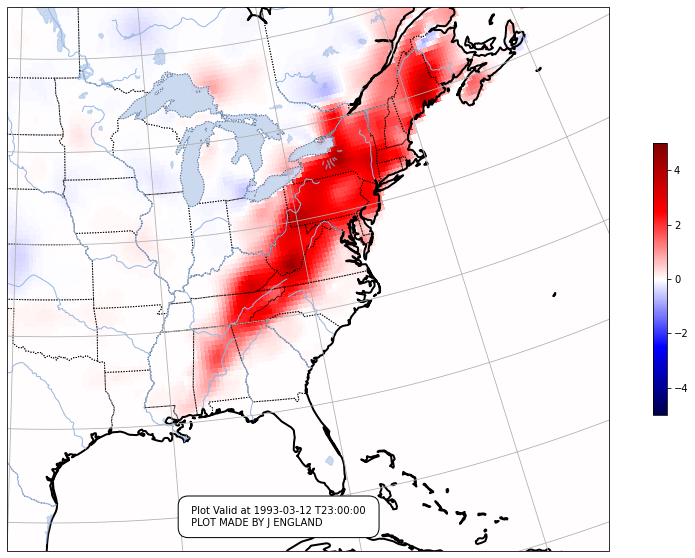

In [12]:
snow1 = ds.SD_GDS0_SFC[71]
snow0 = ds.SD_GDS0_SFC[0]
snow = (snow1-snow0)/.025

fig = plt.figure(figsize=(16, 10))

centlon = -97.5
centlat = 40
proj=ccrs.LambertConformal(central_latitude=centlat, central_longitude=centlon)
ax = fig.add_subplot(1,1,1,projection=proj) 
features(ax)
cmap = plt.cm.seismic
norm = plt.Normalize(-5,5)
levels = np.arange(np.min(snow.values),np.max(snow.values),4)
cm = ax.pcolormesh(lon,lat,snow,shading='auto',cmap=cmap, norm=norm, transform=ccrs.PlateCarree())

plt.colorbar(cm,orientation = "vertical", shrink = 0.5)

plt.figtext(0.38,0.16,f' Plot Valid at 1993-03-12 T23:00:00 \n PLOT MADE BY J ENGLAND',size =10,
          bbox=dict(facecolor='white',edgecolor='black', boxstyle='round,pad=1'));